In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Data Visualisation

In [59]:
from keras.datasets import cifar10
(X_train,y_train), (X_test,y_test) = cifar10.load_data()

In [80]:
X_train.shape

(50000, 32, 32, 3)

In [62]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

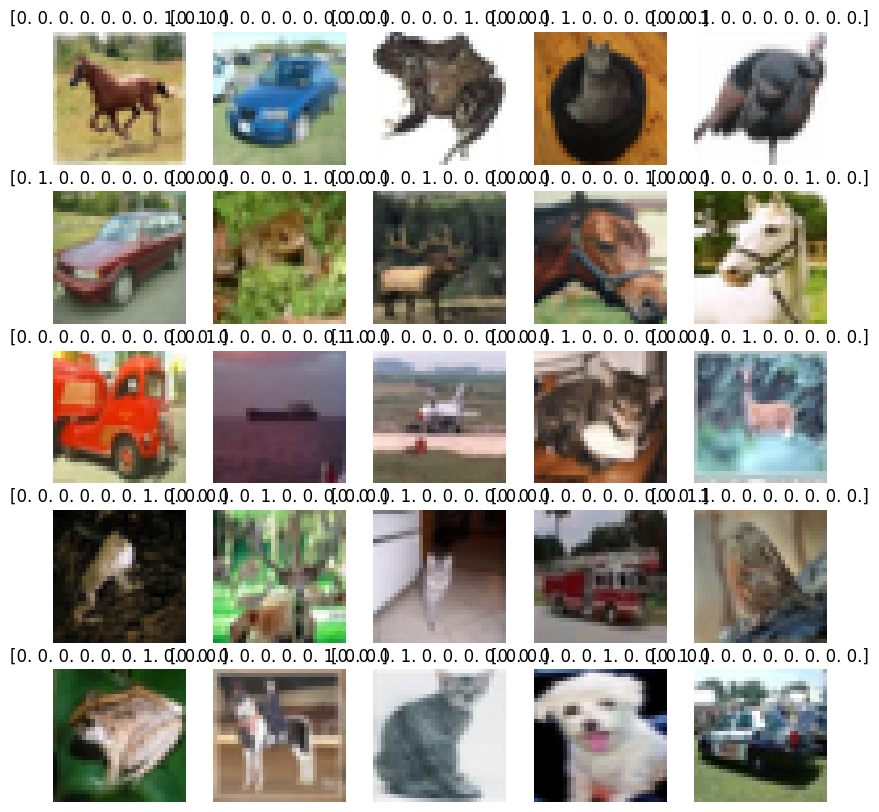

In [83]:
fig,axs = plt.subplots(5,5,figsize = (10,10))
axs = axs.ravel()
item = len(X_train)
for i in np.arange(0, 5*5):
  index = np.random.randint(0,item)
  axs[i].imshow(X_train[index])
  axs[i].set_title(y_train[index])
  axs[i].axis('off')
  # plt.tight_layout()

testing ravel function 

In [84]:
# fig, axs = plt.subplots(2, 3, figsize=(8, 5))

# # Get a flattened array of subplots
# axs = axs.ravel()

# # Iterate over the subplots and plot some data
# for i, ax in enumerate(axs):
#     x = np.linspace(0, 1, 100)
#     y = np.sin((i + 1) * 2 * np.pi * x)
#     ax.plot(x, y)
#     ax.set_title(f"Plot {i+1}")
#     print(i,ax)
    
# plt.tight_layout()
# plt.show()

Data Preparation

In [65]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [66]:
import keras 
y_train  = keras.utils.to_categorical(y_train,10)
y_test = keras.utils.to_categorical(y_test,10)

In [67]:
X_train = X_train /255
X_test = X_test/255

In [68]:
inpt_shape = X_train.shape[1:]
inpt_shape

(32, 32, 3)

In [69]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,AveragePooling2D,Dense,Flatten,Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [70]:
cnn_model = Sequential()
cnn_model.add(Conv2D(kernel_size = (3,3),filters = 32,activation='relu',input_shape = inpt_shape))
cnn_model.add(Conv2D(kernel_size = (3,3),filters = 32,activation='relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.3))
# another cnn layer
cnn_model.add(Conv2D(kernel_size = (3,3),filters = 64,activation='relu'))
cnn_model.add(Conv2D(kernel_size = (3,3),filters = 64,activation='relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.2))
# Flatten the value[making it 1D]
cnn_model.add(Flatten())
cnn_model.add(Dense(units=512,activation= 'relu'))
cnn_model.add(Dense(units=512,activation= 'relu'))
cnn_model.add(Dense(units=10,activation= 'softmax'))

In [71]:
cnn_model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.RMSprop(lr=0.001), metrics=['accuracy'])

/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [72]:
from keras.preprocessing.image import ImageDataGenerator

# augmentation parameters
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Fit data generator on training data
datagen.fit(X_train)

# Train model using augmented data
cnn_model.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=2, validation_data=(X_test, y_test))



Epoch 1/2
1563/1563 [==============================] - 183s 116ms/step - loss: 2.3029 - accuracy: 0.0992 - val_loss: 2.2961 - val_accuracy: 0.0999
Epoch 2/2
1563/1563 [==============================] - 184s 117ms/step - loss: 2.3028 - accuracy: 0.0963 - val_loss: 2.2962 - val_accuracy: 0.0998


In [73]:
evaluation = cnn_model.evaluate(X_test,y_test)
print("Test Loss:", evaluation[0])
print("Test Accuracy:", evaluation[1])

313/313 [==============================] - 7s 22ms/step - loss: 2.2962 - accuracy: 0.0998
Test Loss: 2.296210765838623
Test Accuracy: 0.0997999981045723


In [74]:
y_pred = np.argmax(cnn_model.predict(X_test), axis=-1)

313/313 [==============================] - 7s 22ms/step


In [87]:
y_test = y_test.argmax(1)
y_pred,y_test

<Axes: >

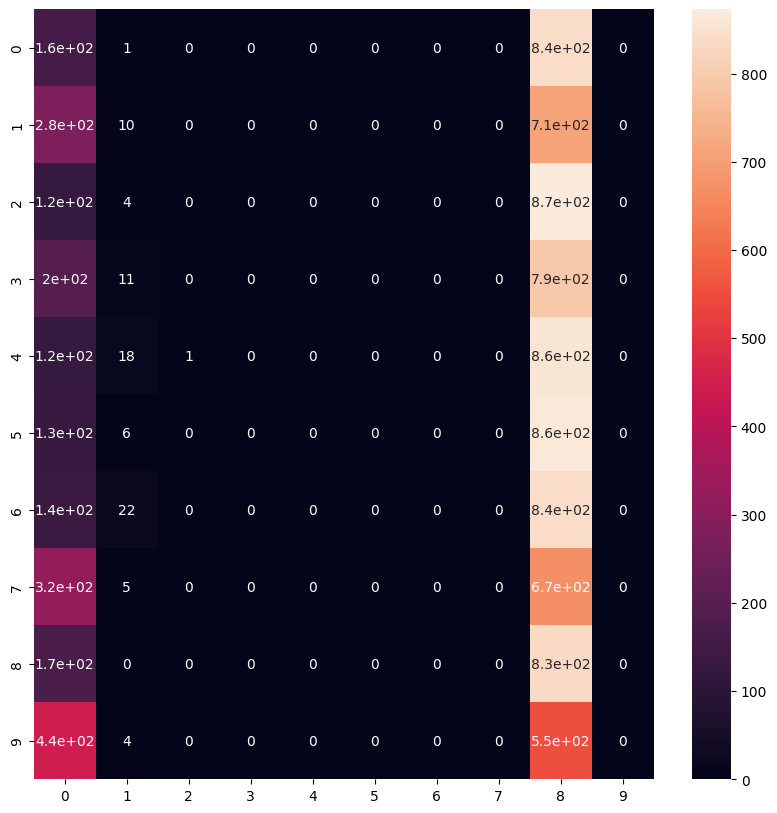

In [76]:
from sklearn.metrics import confusion_matrix
res = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(10,10))
sns.heatmap(res,annot= True)